In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
def load_calibration_data(file):
    try:
        data = np.load(file)
        K = data["K"]         
        dist = data["dist"]    
        shape = tuple(data["shape"])
        return K, dist, shape
    except Exception as e:
        print(f"Error loading {file}: {e}")
        return None, None, None

In [32]:
calibration_file = "calib_results_webcam.npz"
# calibration_file = "calib_results_phonecam.npz"

K, dist, shape = load_calibration_data(calibration_file)
if K is None or dist is None:
    raise ValueError("Calibration data could not be loaded.")

img = cv2.imread("bookself.jpg")

if img is None:
    raise FileNotFoundError(f"Could not load image at {image_path}")

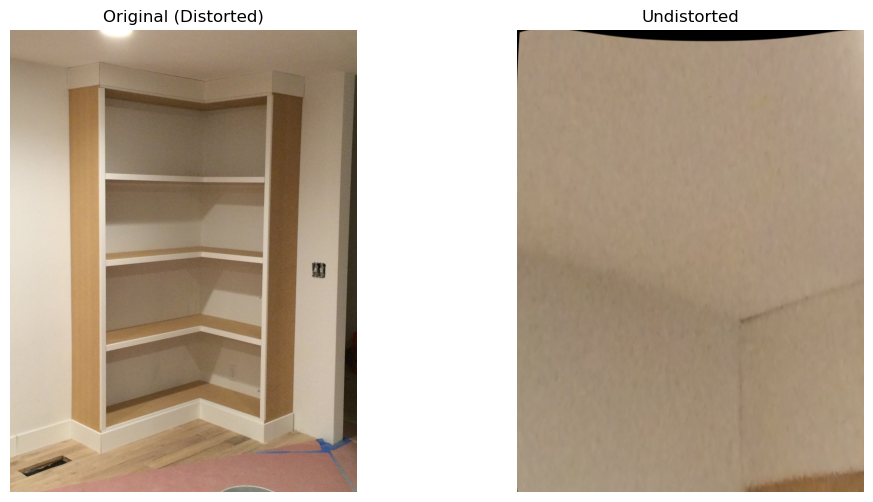

In [33]:
h, w = img.shape[:2]
new_K, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w, h), 1, (w, h))
undistorted = cv2.undistort(img, K, dist, None, new_K)

# Convert BGR -> RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
undistorted_rgb = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB)

# Show before vs after
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original (Distorted)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(undistorted_rgb)
plt.title("Undistorted")
plt.axis("off")

plt.show()

In [34]:
calibration_file = "calib_results_phonecam.npz"

K, dist, shape = load_calibration_data(calibration_file)
if K is None or dist is None:
    raise ValueError("Calibration data could not be loaded.")

img = cv2.imread("bookself.jpg")

if img is None:
    raise FileNotFoundError(f"Could not load image at {image_path}")

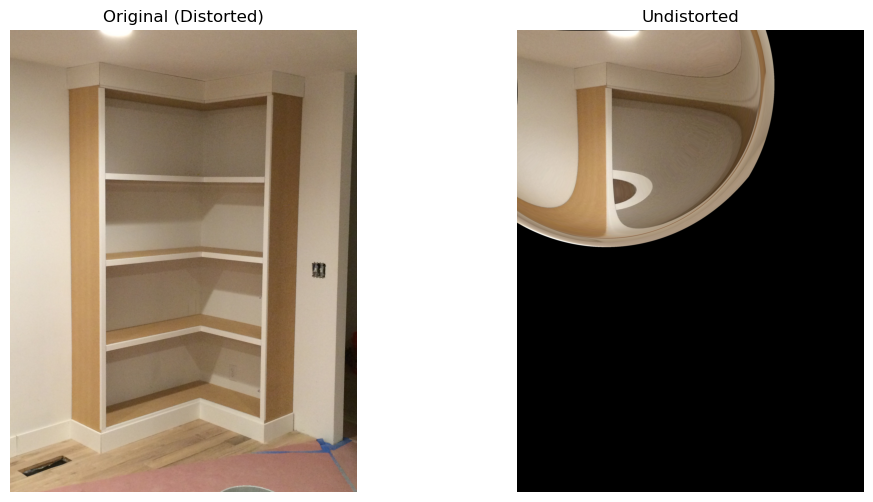

In [35]:
h, w = img.shape[:2]
new_K, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w, h), 1, (w, h))
undistorted = cv2.undistort(img, K, dist, None, new_K)

# Convert BGR -> RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
undistorted_rgb = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB)

# Show before vs after
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original (Distorted)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(undistorted_rgb)
plt.title("Undistorted")
plt.axis("off")

plt.show()